# Exploring Suicide Rates and Factors Over 1990 - 2019

## Collaborators: 
- Dalya Lami
- Jahn Ferdinandus
- Ali Alam
- Dayana Imanova



In [48]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import requests
import os

In [2]:
# File to Load
suicide_rates_1985_2021 = Path("Resources/suicide_rates_1985-2021.csv")

suicide_rates_df = pd.read_csv(suicide_rates_1985_2021)
suicide_rates_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


In [3]:
# List of columns
suicide_rates_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [4]:
# Clean the dataframe by removing "HDI for year" column 
suicide_rates_df = suicide_rates_df.drop('HDI for year', axis=1)
suicide_rates_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,"2,15,66,24,900",796.0,Boomers


In [5]:
# Total number of countries
country_count = suicide_rates_df['country'].nunique()
country_count

114

In [6]:
# Identifying the types of data
suicide_rates_df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no           float64
population              int64
suicides/100k pop     float64
country-year           object
 gdp_for_year ($)      object
gdp_per_capita ($)    float64
generation             object
dtype: object

In [26]:
# Identifying the suicide count for 1990
suicide_rates_1990 = suicide_rates_df[suicide_rates_df['year'] == 1990]
suicide_rates_1990_cleaned=suicide_rates_1990.dropna()
grouped_by_year_1990 = pd.DataFrame(suicide_rates_1990.groupby('country')['suicides_no'].sum())
grouped_by_year_1990.head(5)

,suicides_no
country,
Antigua and Barbuda,1.0
Argentina,2140.0
Armenia,93.0
Australia,2202.0
Austria,1825.0


In [27]:
# Identifying the suicide count for 2019
suicide_rates_2019 = suicide_rates_df[suicide_rates_df['year'] == 2019]
suicide_rates_2019_cleaned=suicide_rates_2019.dropna()
grouped_by_year_2019 = pd.DataFrame(suicide_rates_2019_cleaned.groupby('country')['suicides_no'].sum())
grouped_by_year_2019.head(5)

,suicides_no
country,
Argentina,3254.0
Armenia,49.0
Australia,3318.0
Austria,1113.0
Brazil,9892.0


In [28]:
# Grouping countires that are present in both 1990 and 2019
common_country_list = set(grouped_by_year_1990.index) & set(grouped_by_year_2019.index)
grouped_by_year_1990 = grouped_by_year_1990[grouped_by_year_1990.index.isin(common_country_list)]
grouped_by_year_1990.head(5)

,suicides_no
country,
Argentina,2140.0
Armenia,93.0
Australia,2202.0
Austria,1825.0
Brazil,4803.0


In [29]:
grouped_by_year_2019 = grouped_by_year_2019[grouped_by_year_2019.index.isin(common_country_list)]
grouped_by_year_2019.head(5)

,suicides_no
country,
Argentina,3254.0
Armenia,49.0
Australia,3318.0
Austria,1113.0
Brazil,9892.0


In [11]:
# Grouped fianl Dataframe 
grouped_by_year_2019.groupby(["country"])[["suicides_no"]]
suicide_rates_2019

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
27902,Antigua and Barbuda,2019,male,5-14 years,NaN,92117,0.000000,Antigua and Barbuda2019,1687533333,17376.649680,Generation X
27903,Argentina,2019,male,5-14 years,39.0,44938712,0.086785,Argentina2019,4.52E+11,10056.637940,Generation X
27904,Armenia,2019,male,5-14 years,0.0,2820602,0.000000,Armenia2019,13619291361,4604.646324,Generation X
27905,Australia,2019,male,5-14 years,10.0,25340217,0.039463,Australia2019,1.39E+12,54875.285960,Generation X
27906,Austria,2019,male,5-14 years,1.0,8879920,0.011261,Austria2019,4.45E+11,50114.401110,Generation X
...,...,...,...,...,...,...,...,...,...,...,...
31587,Ukraine,2019,female,75+ years,264.0,44386203,0.594779,Ukraine2019,1.54E+11,3661.456204,G.I. Generation
31588,United Kingdom,2019,female,75+ years,85.0,66836327,0.127176,United Kingdom2019,2.88E+12,43070.498360,G.I. Generation
31589,United States of America,2019,female,75+ years,568.0,328329953,0.172997,United States of America2019,2.14E+13,65279.529030,G.I. Generation
31590,Uruguay,2019,female,75+ years,23.0,3428409,0.670865,Uruguay2019,61231149881,17688.015010,G.I. Generation


In [30]:
# Summarizing key statistics related to suicide rates
summery_df = suicide_rates_df.groupby(["country"])[["suicides/100k pop"]].agg(["mean", "median", "var", "std", "sem"])
summery_df.head()

suicides/100k pop                                        
                                 mean median         var        std       sem
country                                                                      
Albania                      3.502879  2.970   11.778946   3.432047  0.211228
Antigua and Barbuda          0.481559  0.000   10.018676   3.165229  0.164109
Argentina                    9.324805  4.680  133.655526  11.560948  0.564117
Armenia                      2.836908  1.355   13.675197   3.697999  0.198806
Aruba                        9.503095  0.000  625.830928  25.016613  1.930074

In [51]:
# Create a folder for plots
output = 'Output_Files'

# Create the folder if it doesn't exist
if not os.path.exists(output):
    os.makedirs(output)

## Explore the correlation between suicide rates and geographical regions by comparing suicide rates.

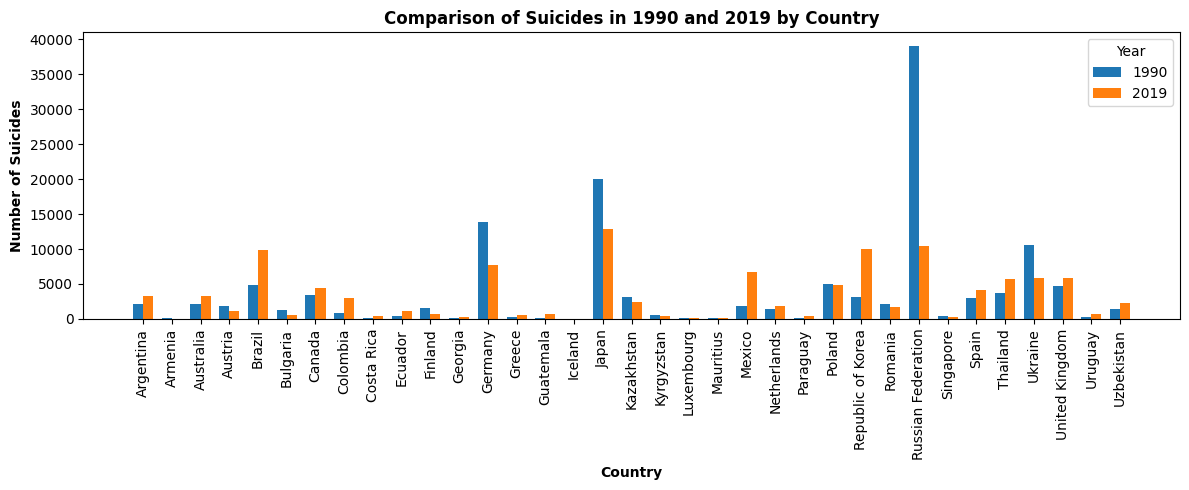

In [53]:
# Create an array of country names
countries = grouped_by_year_1990.index

# Create an array of indices to position the bars for 1990 and 2019
x = np.arange(len(countries))

# Width of each bar
width = 0.35

# Create subplots for side-by-side comparison
fig, ax = plt.subplots(figsize=(12, 5))

# Plot for 1990
ax.bar(x - width/2, grouped_by_year_1990['suicides_no'], width, label='1990')
# Plot for 2019
ax.bar(x + width/2, grouped_by_year_2019['suicides_no'], width, label='2019')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=90)
ax.set_xlabel('Country', fontweight='bold')
ax.set_ylabel('Number of Suicides', fontweight='bold')
ax.set_title('Comparison of Suicides in 1990 and 2019 by Country',fontweight='bold')

# Set the legend
ax.legend(title='Year')

# Save the file 
plt.savefig(os.path.join(output, 'suicides_comparison_1990_vs_2019.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

### Analysis of Number of Suicides per Country (1990 vs. 2019)
We employed a bar graph to visually represent the number of suicides in each country for two critical years: 1990 and 2019. This analysis offers essential insights into the evolving landscape of suicide rates over the two decades.
#### High Suicide Rates in 1990:
- Countries such as Germany, Japan, Russia, and Ukraine exhibited notably high suicide rates in 1990. This observation reflects the challenges these nations faced in addressing mental health and suicide prevention during that period.
#### Changes in Suicide Rates:
- Contrasting this, it's important to highlight countries like Brazil, Mexico, South Korea, and the United Kingdom. These countries have experienced an increase in their suicide rates by the year 2019.
#### Overall Trends:
- One notable trend emerging from this analysis is the reduction in the overall number of suicides between 1990 and 2019. This reduction is indicative of potential progress in suicide prevention and mental health support strategies over the years.
In both hemispheres, Latitude is a significant predictor of Max Temperature, with clear linear trends.

## Determine which age groups are most affected by suicide based on total suicide count.

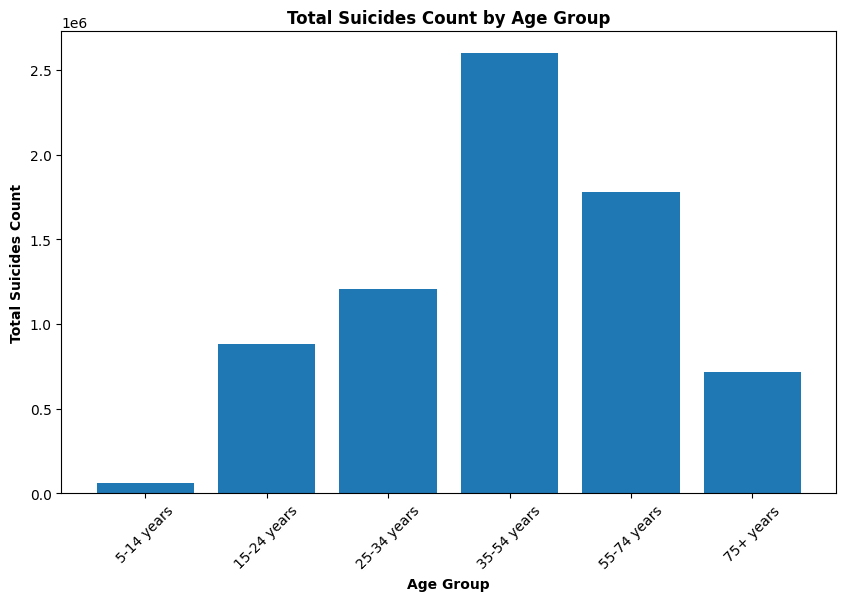

In [55]:
age_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']

age_suicide_counts = (
    suicide_rates_df.groupby('age')['suicides_no']
    .sum()
    .reindex(age_order)
    .reset_index()
)

plt.figure(figsize=(10, 6))
plt.bar(age_suicide_counts['age'], age_suicide_counts['suicides_no'])

# Set the x-axis ticks and labels
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Total Suicides Count', fontweight='bold')
plt.title('Total Suicides Count by Age Group', fontweight='bold')
plt.xticks(rotation=45)

# Save the file 
plt.savefig(os.path.join(output, 'suicides_by_age_group_per_total.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Analysis of Total Suicides by Age Group:
In the first graph, which represents the total number of suicides in each age group, we observe the following:
- The age group with the highest number of suicides is between 35 and 54 years. This age category shows the highest count of suicides, indicating a critical age range for suicide prevention efforts.
- Following closely is the age group between 55 and 74 years, with the second-highest number of suicides. This highlights the significance of addressing mental health concerns in this age range.

## Determine which age groups are most affected by suicide based on suicides per 100K of population

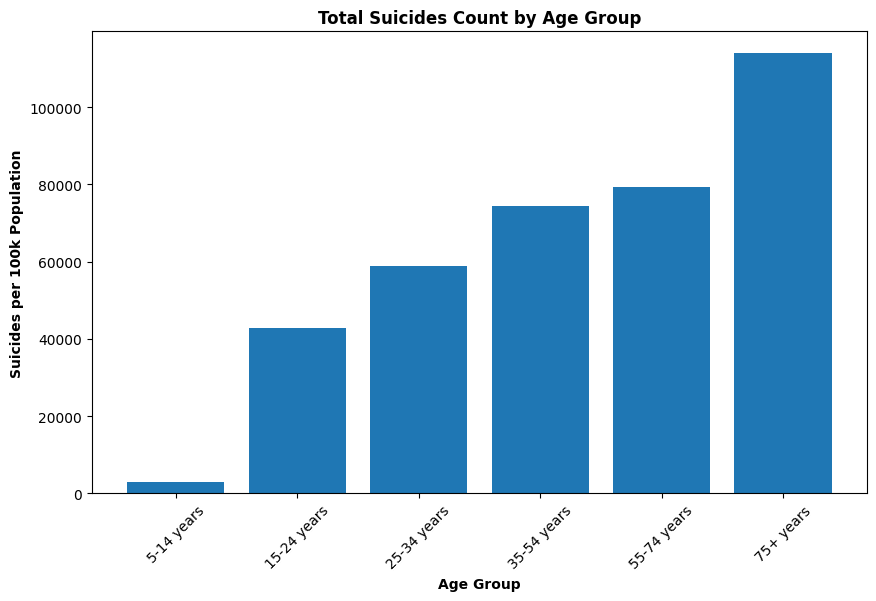

In [56]:
age_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']

age_suicide_counts = (
    suicide_rates_df.groupby('age')['suicides/100k pop']
    .sum()
    .reindex(age_order)
    .reset_index()
)

plt.figure(figsize=(10, 6))
plt.bar(age_suicide_counts['age'], age_suicide_counts['suicides/100k pop'])

# Set the x-axis ticks and labels
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Suicides per 100k Population', fontweight='bold')
plt.title('Total Suicides Count by Age Group', fontweight='bold')
plt.xticks(rotation=45)

# Save the file 
plt.savefig(os.path.join(output, 'suicides_by_age_group_per_100K.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Analysis of Suicides per 100,000 Population by Age Group:
In the second graph, which represents suicides per 100,000 population in each age group, the observations are different:
- The age group with the highest rate of suicides per 100,000 population is the "75+ years" category. This indicates a higher risk of suicide for individuals in this age group when considering population size.
- The second-highest rate of suicides per 100,000 population is in the "55-74 years" age bracket. This finding emphasizes that, when adjusted for population size, middle-aged and early elderly individuals face a relatively higher risk of suicide.

## Analyze the relationship between suicide rates and gender.

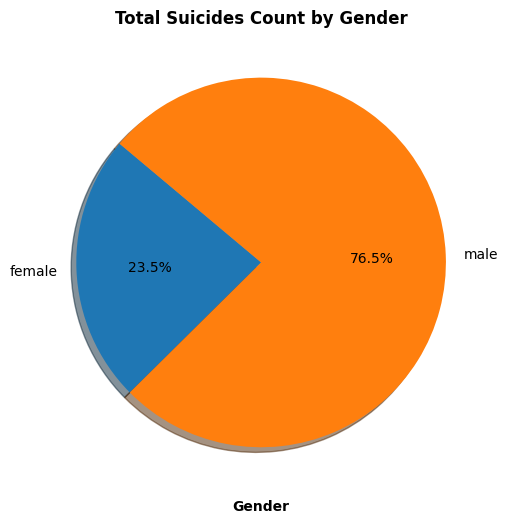

In [57]:
# Group by 'sex' and calculate the sum of 'suicides_no' for each gender
gender_suicide_counts = suicide_rates_df.groupby('sex')['suicides_no'].sum().reset_index()

# Create a bar plot to compare male and female suicide counts
plt.figure(figsize=(8, 6))
labels = gender_suicide_counts['sex']
sizes = gender_suicide_counts['suicides_no']

#plot chart
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)

# labels and a title & save
plt.xlabel('Gender', fontweight='bold')
plt.title('Total Suicides Count by Gender', fontweight='bold')

# Save the file 
plt.savefig(os.path.join(output, 'suicides_by_gender_total.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Analysis of Total Suicides by Gender:
In this analysis, we employed a pie chart to provide a clear visual representation of the distribution of total suicides by gender. This examination allows for a straightforward comparison of suicide counts between males and females.
#### Men significantly outnumber women in suicide cases:
- The pie chart reveals a striking gender imbalance in suicide rates. Males account for a substantial majority, representing approximately 76.5% of the total suicides.
- Conversely, females constitute a smaller portion of the total suicides, accounting for approximately 23.5%. This percentage is notably lower compared to males.

A key observation is that males have approximately three times the number of suicides compared to females. This significant gender disparity underscores the need for gender-specific approaches in suicide prevention efforts.

## Analyze the relationship between suicide rates and gender by comparing suicide rates in 1990 and 2019.

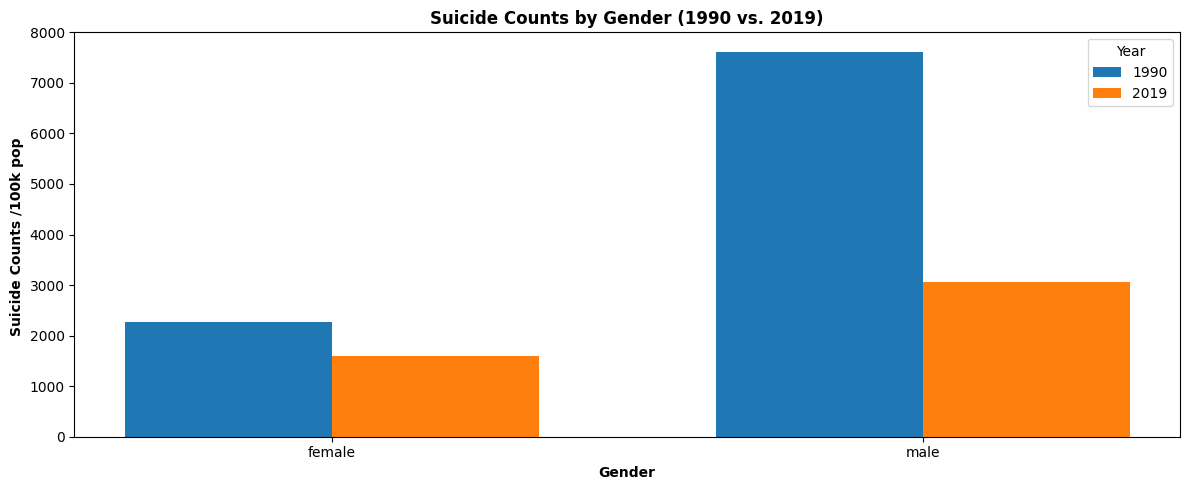

In [58]:
# Filter the data for the year 1990 and group by "sex" to get suicide counts
suicide_data_1990 = suicide_rates_df[suicide_rates_df['year'] == 1990]
gender_suicide_counts_1990 = suicide_data_1990.groupby('sex')['suicides/100k pop'].sum().reset_index()

# Filter the data for the year 2019 and group by "sex" to get suicide counts
suicide_data_2019 = suicide_rates_df[suicide_rates_df['year'] == 2019]
gender_suicide_counts_2019 = suicide_data_2019.groupby('sex')['suicides/100k pop'].sum().reset_index()

# Create an array of country names
sex = pd.DataFrame(suicide_data_1990.groupby('sex'))
sex = sex[0].value_counts().index


# Create an array of indices to position the bars for 1990 and 2019
x = np.arange(len(sex))

# Width of each bar
width = 0.35

# Create subplots for side-by-side comparison
fig, ax = plt.subplots(figsize=(12, 5))

# Plot for 1990
ax.bar(x - width/2, gender_suicide_counts_1990['suicides/100k pop'], width, label='1990')
# Plot for 2019
ax.bar(x + width/2, gender_suicide_counts_2019['suicides/100k pop'], width, label='2019')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(sex)
ax.set_xlabel('Gender',fontweight='bold')
ax.set_ylabel('Suicide Counts /100k pop ',fontweight='bold')
ax.set_title('Suicide Counts by Gender (1990 vs. 2019)',fontweight='bold')
ax.set_ylim([0, 8000])

# Set the legend
ax.legend(title='Year')

# Save the file 
plt.savefig(os.path.join(output, 'suicides_by_gender_per_100K_1990_vs_2019.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

### Analysis of Total Suicides per 100k Population by Gender (1990 vs. 2019):
In this analysis, we employed a bar graph to examine the total suicides per 100k population for males and females in both 1990 and 2019. This visual comparison allows us to identify gender-specific trends in suicide rates over the two decades.
#### Suicide Rates in 1990 (per 100k population):
- For males in 1990, the suicide rate was a little over 2000, indicating a significant number of suicides in this gender group.
- For females in 1990, the suicide rate was approximately 1600, reflecting a substantial but relatively lower number of suicides compared to males.
#### Suicide Rates in 2019 (per 100k population):
In 2019, there has been a notable increase in suicide rates for both genders.
- For males in 2019, the suicide rate has risen to almost 8000 per 100k population, signifying a considerable surge in suicides among males over the years.
- For females in 2019, the suicide rate has also increased, exceeding 3000 per 100k population, which is significantly higher compared to 1990.

## Examine the correlation between GDP per capita and suicide rates per 100k Population.

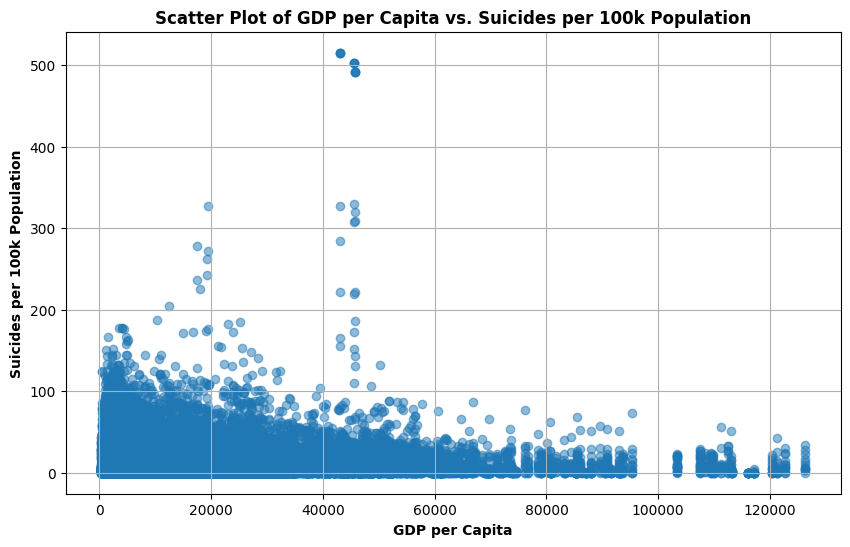

In [59]:
# Extract the relevant columns from the DataFrame
gdp_per_capita = suicide_rates_df['gdp_per_capita ($)']
suicides_per_100k_pop = suicide_rates_df['suicides/100k pop'] 

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(gdp_per_capita, suicides_per_100k_pop, alpha=0.5) 

# Set the labels
plt.xlabel('GDP per Capita', fontweight='bold')
plt.ylabel('Suicides per 100k Population', fontweight='bold')  
plt.title('Scatter Plot of GDP per Capita vs. Suicides per 100k Population', fontweight='bold')  
plt.grid(True)

# Save the file 
plt.savefig(os.path.join(output, 'suicides_per_100K_vs_GDP.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Analysis of GDP per Capita vs. Suicides per 100k Population:
This scatter plot examines the relationship between GDP per capita and suicide rates across about 40 countries. The goal is to identify trends and patterns in this relationship.
- Rising Suicide Rates with GDP Increase: Suicide rates tend to increase as GDP per capita rises from 20,000 to 45,000, indicating potential socioeconomic pressures.
- Stable Rates Beyond 45,000: Beyond a GDP per capita of approximately 45,000 to 50,000, suicide rates stabilize around 50 per 100k population.
- Outliers at High Income Levels: Some countries with high GDP per capita exhibit unexpectedly high suicide rates, emphasizing the role of non-economic factors.

While there's a general trend of increasing suicide rates with rising GDP per capita up to a point, this relationship is complex. Mental health support systems, cultural attitudes, and other factors also influence suicide rates.

## Exporting and cleaning a Mental Health Expenditure DataFrame.

In [32]:
mental_health_expenditure = Path("Resources/health_expenditure_2011.csv")

mental_health_expenditure_df = pd.read_csv(mental_health_expenditure)

selected_columns = mental_health_expenditure_df[["Location", "Value"]]

selected_columns.columns = ["country", "% of Gov Exp"]

mental_health_expenditure_df = selected_columns

mental_health_expenditure_df.head(5)


,country,% of Gov Exp
0,Zimbabwe,0.01
1,Papua New Guinea,0.10
2,Mozambique,0.16
3,Cameroon,0.26
4,Peru,0.27


In [33]:
# The original DataFrame for the year 2011
suicides_2011_df = suicide_rates_df[suicide_rates_df['year'] == 2011]

# Grouprf the filtered data by 'country' and summed the 'suicides_no' values
suicides_by_country_2011 = suicides_2011_df.groupby('country')['suicides/100k pop'].sum().reset_index()

# Merged the DataFrame with the summed suicides data based on 'country'
merged_df = mental_health_expenditure_df.merge(suicides_by_country_2011, on='country', how='left')

# Renamed the newly added column
merged_df.rename(columns={'suicides_no': 'suicides/100k pop'}, inplace=True)

merged_df.head(5)


,country,% of Gov Exp,suicides/100k pop
0,Zimbabwe,0.01,NaN
1,Papua New Guinea,0.10,NaN
2,Mozambique,0.16,NaN
3,Cameroon,0.26,NaN
4,Peru,0.27,NaN


In [22]:
# Removing rows with NaN values from the DataFrame
merged_df_cleaned = merged_df.dropna()

# Cleaned DataFrame
merged_df_cleaned.shape


(40, 3)

## Visualize the relationship between the percentage of government expenditure and suicide rates per 100k population for the year 2011.

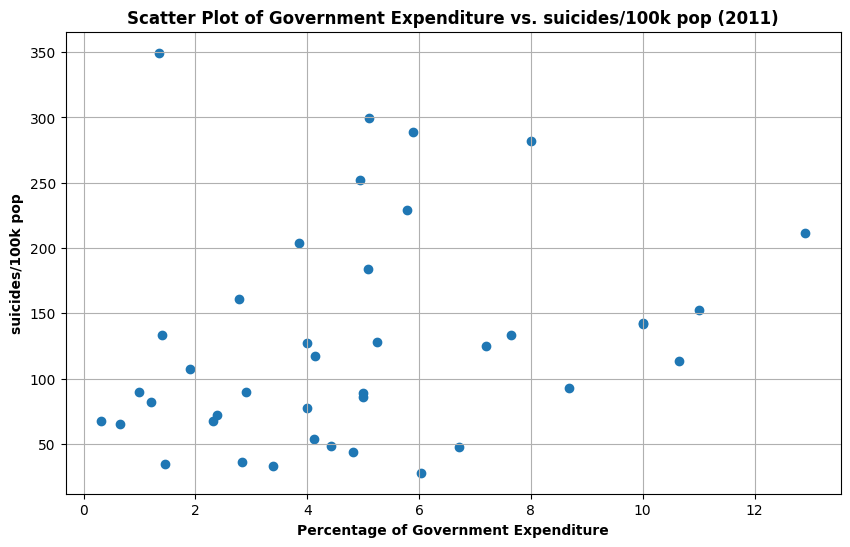

In [60]:
gdp_per_capita = merged_df_cleaned['% of Gov Exp']
suicides_2011 = merged_df_cleaned['suicides/100k pop']

#Plot
plt.figure(figsize=(10, 6))
plt.scatter(gdp_per_capita, suicides_2011, alpha=1)

plt.xlabel('Percentage of Government Expenditure', fontweight='bold')
plt.ylabel('suicides/100k pop', fontweight='bold')
plt.title('Scatter Plot of Government Expenditure vs. suicides/100k pop (2011)', fontweight='bold')
plt.grid(True)

# Save the file 
plt.savefig(os.path.join(output, 'suicides_per_100K_vs_Government_Expenditure.png'), dpi=300, bbox_inches='tight')

plt.show()